In [1]:
# conda install -c conda-forge altair vega_datasets notebook vega 

In [2]:
# pip install tqdm gender_guesser

In [3]:
!ls

imdb.ipynb            lessons_learned.ipynb np.ipynb


In [4]:
import pandas as pd
import gender_guesser.detector as gender_detector
from tqdm import tqdm
import seaborn as sns
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("../data/llis.csv", encoding = "ISO-8859-1", engine='python')

In [7]:
df.head()

,LessonId,Submitter1,Title,Abstract,Lesson,Organization,LessonDate,MissionDirectorate,SafetyIssue,Categories,DocNum,Topic,Category,url
0,9501,"Bell, Michael",Manhole Arc-Flash Risk Reduction,Power system distribution at Kennedy Space C...,Laboratory testing revealed higher than anti...,KSC,6/6/14,"Aeronautics Research, Human Exploration and Op...",True,"Energy, Facilities, Industrial Operations, Per...",1,22,Energy,https://nen.nasa.gov/web/11/viewall/-/viewall/...
1,8018,"Bell, Michael",CRCA Sampling Process Lessons Learned,"The sampling and analysis processes, used to...",The particle contamination monitoring was in...,KSC,3/11/14,"Human Exploration and Operations,",False,NaN,2,18,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/...
2,8701,"Oberhettinger, David",Take Special Care to Avoid Misprobing When Usi...,An operator error involving mis-probing duri...,The common use of BOBs during subsystem/syst...,JPL,2/18/14,"Aeronautics Research, Human Exploration and Op...",True,"Integration and Testing, Safety and Mission As...",3,31,Integration and Testing,https://nen.nasa.gov/web/11/viewall/-/viewall/...
3,8017,"Bell, Michael",Using Heritage Equipment From Uncontrolled Sou...,The Restore Project obtained excessed equipm...,Implement a Ðtrust but verifyÓ philosophy wh...,KSC,1/21/14,"Human Exploration and Operations,",False,"Integration and Testing,",4,8,Integration and Testing,https://nen.nasa.gov/web/11/viewall/-/viewall/...
4,8601,"Oberhettinger, David",Reflight of Spacecraft Designs May be Inhibite...,The JPL focus on primarily one-of-a-kind fli...,\n\n Reflight of a system design is becomin...,JPL,12/3/13,"Aeronautics Research, Human Exploration and Op...",False,"Missions and Systems Requirements Definition, ...",5,26,Missions and Systems Requirements Definition,https://nen.nasa.gov/web/11/viewall/-/viewall/...


In [8]:
df["Submitter1"].head()

0            Bell, Michael
1           Bell, Michael 
2    Oberhettinger, David 
3           Bell, Michael 
4    Oberhettinger, David 
Name: Submitter1, dtype: object

In [9]:
df["LessonDate"]=pd.to_datetime(df["LessonDate"])

In [10]:
df[['name_last','name_first']] = df['Submitter1'].str.split(',',expand=True)

In [11]:
df["name_first"] = df["name_first"].str.strip()
df["name_first"] = df["name_first"].fillna("Unknown")
#df["name_first"] = df["name_first"].str.replace("Wil","William")

In [12]:
first_names = df['name_first'].value_counts().index.tolist()

In [13]:
gd = gender_detector.Detector()


In [14]:
genders = []
for fn in tqdm(first_names):
    gender = gd.get_gender(fn)
    fn = fn.upper()
    if fn in ['DALE', 'RYAN', 'TRONG', 'RANDY', 'CHIEN', 'CLAUDE', 'WIL', 'CASE', 'CALVERT']:
        gender = "male"
    elif fn in ['CAROL', 'MARY', 'KIMBERLY', 'LISA']:
        gender = "female"
    elif fn in ['BARRIE','CHRIS','SHAWN','LESLIE','MINH','AVE', 'REGOR', 'THUYKIEN','SUONG']:
        gender = "andy"
    genders.append (gender)

100%|██████████| 182/182 [00:00<00:00, 53218.30it/s]


In [15]:
gender_df = pd.DataFrame({'gender':genders, 'fname':first_names })

In [16]:
gender_df.head(10)

,gender,fname
0,male,David
1,male,Wil
2,female,Annette
3,unknown,Unknown
4,male,Wilson
5,male,Donald
6,unknown,J
7,female,Jenni
8,female,Lisa
9,male,Richard


In [17]:
gender_df["gender"].value_counts()

male       104
female      46
unknown     21
andy        11
Name: gender, dtype: int64

In [18]:
len(df)

1637

In [19]:
merged_df = pd.merge(gender_df, df, left_on="fname", right_on="name_first")

In [20]:
len(merged_df)

1637

In [21]:
merged_df["LessonDateYear"] = merged_df["LessonDate"].dt.year

In [22]:
merged_df[merged_df["gender"]=="unknown"]["Submitter1"].value_counts()

Unknown              78
Roberts, J           33
Mendoza, DR          21
Underwood, L         14
Oberhettinger, D     13
Guernsey, C          11
Larman, B             7
Papell, S             7
Clark, K              7
Collins, R            6
Martin, S             5
Michalson, G          5
Bott, J               3
Langmaier, J          3
Murphy, M             3
Gussner, A            3
Acord, A              2
Wagoner, B            2
Blosiu, J             2
Lord, D               2
Schaper, P            2
Mallis, R             2
Landano, M            2
Reeves, G             2
McGlynn, R            2
Narvaez, P            2
Clawson, J            2
Savino, J             2
Frederickson, R       1
Gounley, R            1
                     ..
Chen, G               1
McArthur, J           1
Welch, R              1
Seiwell, R            1
Bernard, D            1
Forgrave, J           1
Stell, C              1
Stanford, J           1
Newell, J             1
Muirhead, B           1
Tyler, S        

In [23]:
merged_df.groupby(["gender","LessonDateYear"]).size()

gender   LessonDateYear
andy     1992               1
         1998               1
         1999               1
         2000               1
         2001               3
         2002               1
         2003               4
         2005               1
         2006               4
         2007               2
         2013               4
female   1991               1
         1992              17
         1993               4
         1994               2
         1995              11
         1996              16
         1997               2
         1998               8
         1999               2
         2000               9
         2001               8
         2002              10
         2003              32
         2004               1
         2005              13
         2006               2
         2007               1
         2008               6
         2009               3
                           ..
male     2007              17
         2008   

In [24]:
count_df = merged_df.groupby(["gender","LessonDateYear"]).size().reset_index().rename(columns={0:'count'})
count_df = count_df.sort_values("LessonDateYear")
count_df["LessonDateYear"] = count_df["LessonDateYear"].astype("str")
count_df.head()

,gender,LessonDateYear,count
58,unknown,1990,2
34,male,1991,1
11,female,1991,1
59,unknown,1991,1
12,female,1992,17


In [25]:
count_df["LessonDateYear"].value_counts()

2005    4
2000    4
2003    4
2006    4
1998    4
2001    4
1999    4
1992    4
2013    4
2002    4
2010    3
1993    3
1996    3
2009    3
2007    3
1997    3
1991    3
2012    3
2011    3
1995    3
1994    3
2004    3
2008    2
1990    1
2014    1
Name: LessonDateYear, dtype: int64

In [26]:
merged_df.groupby(["gender","LessonDateYear"])

In [27]:
merged_df.groupby(["name_last","LessonDateYear"]).size().reset_index().sort_values([0], ascending=False)

,name_last,LessonDateYear,0
150,Harkins,1999,171
325,Pitt,2010,95
221,Lengyel,2003,44
217,Lengyel,1999,39
215,Lengyel,1997,36
315,Palmer,2011,33
343,Roberts,1996,32
216,Lengyel,1998,32
149,Harkins,1994,31
415,Unknown,2011,28


In [28]:
merged_df[(merged_df["LessonDateYear"]==1999) & (merged_df["name_last"]=="Harkins")]

,gender,fname,LessonId,Submitter1,Title,Abstract,Lesson,Organization,LessonDate,MissionDirectorate,SafetyIssue,Categories,DocNum,Topic,Category,url,name_last,name_first,LessonDateYear
321,male,Wil,658,"Harkins, Wil",Electrical Grounding Practices for Aerospace H...,NaN,Impact of Non-Practice: \n\n \n\n Th...,MSFC,1999-02-01,"Aeronautics Research, Exploration Systems, Spa...",False,NaN,1087,4,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/658,Harkins,Wil,1999
322,male,Wil,657,"Harkins, Wil",Critical Design Review for Unmanned Missions,Preferred Practice for Design &amp; Test. In ...,Impact of Non-Practice: \n\n \n\n In...,JPL,1999-02-01,"Aeronautics Research, Science, Exploration Sys...",False,NaN,1088,15,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/657,Harkins,Wil,1999
323,male,Wil,702,"Harkins, Wil",Magnetic Design Control for Science Instruments,Preferred Practice for Design &amp; Test. Mag...,Magnetometer experiment data will be corrupte...,JPL,1999-02-01,"Aeronautics Research, Science, Exploration Sys...",False,NaN,1089,35,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/702,Harkins,Wil,1999
324,male,Wil,701,"Harkins, Wil",Static Cryogenic Seals for Launch Vehicle Appl...,NaN,The principal impact of nonpractice is unacce...,MSFC,1999-02-01,"Aeronautics Research, Science, Exploration Sys...",False,NaN,1090,3,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/701,Harkins,Wil,1999
325,male,Wil,700,"Harkins, Wil",Fracture Mechanics Reliability,NaN,Nonpractice of deterministic fracture mechani...,JSC,1999-02-01,"Aeronautics Research, Science, Exploration Sys...",False,NaN,1092,16,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/700,Harkins,Wil,1999
326,male,Wil,655,"Harkins, Wil",Preliminary Design Review,Preferred Practice for Design &amp; Test. One...,Impact of Nonpractice: \n\n \n\n One...,JPL,1999-02-01,"Aeronautics Research, Science, Exploration Sys...",False,NaN,1093,15,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/655,Harkins,Wil,1999
327,male,Wil,699,"Harkins, Wil",Structural Analysis in the Design of Optical M...,NaN,Not using a detailed structural analysis of a...,GSFC,1999-02-01,"Aeronautics Research, Science, Exploration Sys...",False,NaN,1094,10,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/699,Harkins,Wil,1999
328,male,Wil,698,"Harkins, Wil",Ammonia-Charged Aluminum Heat Pipes with Extru...,NaN,Heat transfer by means other than the heat pi...,GSFC,1999-02-01,"Aeronautics Research, Science, Exploration Sys...",False,NaN,1095,7,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/698,Harkins,Wil,1999
329,male,Wil,654,"Harkins, Wil",Assessment and Control of Electrical Charges,NaN,Impact of Nonpractice: \n\n \n\n Adv...,GSFC,1999-02-01,"Aeronautics Research, Science, Exploration Sys...",False,NaN,1096,23,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/654,Harkins,Wil,1999
330,male,Wil,697,"Harkins, Wil",Active Redundancy,NaN,The designer should consider redundancy for r...,GRC,1999-02-01,"Aeronautics Research, Science, Exploration Sys...",False,NaN,1097,19,NaN,https://nen.nasa.gov/web/11/viewall/-/viewall/697,Harkins,Wil,1999


In [29]:
merged_df[merged_df["LessonDateYear"]==1999]["Submitter1"].value_counts()

Harkins, Wil          130
Harkins, Wilson        41
Lengyel, David         39
Zimmer, Dave            7
Morris, Joe             4
Acord, A                2
Nebrig, John            2
Landano, M              2
Dutton, Jeff            2
Van Dyke, Case          1
Wirth, J                1
Gaspar, Nicholas        1
Bastedo, W              1
Raynor, Eric            1
Slonski, J              1
Tobin, Maria            1
Striegel, Roger         1
Woloshin, Mark          1
Rice, Robert            1
Oberhettinger, D        1
Jungewaelter, Jan       1
Fritsche, Ralph         1
Lauer, Michael          1
Huls, Dale              1
Dominguez, Manuel       1
Rupley, Kate            1
Forgrave, J             1
Combes, Larry           1
Powers, Charles         1
Ortner, Randy           1
Baisley, R              1
Mason, Keith            1
Margolies, Don          1
Curtis, Leslie          1
Kohlbrand, Jim          1
Rutledge, Pete          1
Koby, Ken               1
Moore, W                1
Watson, Gran

In [30]:
merged_df[merged_df["LessonDateYear"]==2010]["Submitter1"].value_counts()

Pitt, Annette            92
Unknown                  21
Oberhettinger, David     12
Palmer, Jenni            11
Kinder, Kristen           8
Pitt, Marie               3
Kehrer, Kristen           2
Sheldon, David            1
Zupp, George              1
Kortes, Trudy             1
Burns, Edward             1
Palmieri, Diane           1
Hallam, Richard           1
Martin, Dawn              1
Rosanova, Giovanni        1
Bond, Rebecca             1
Booher, Rebecca           1
Name: Submitter1, dtype: int64

In [31]:
min(merged_df["LessonId"])

15

In [32]:
max(merged_df["LessonId"])

9501

In [33]:
len(merged_df)

1637

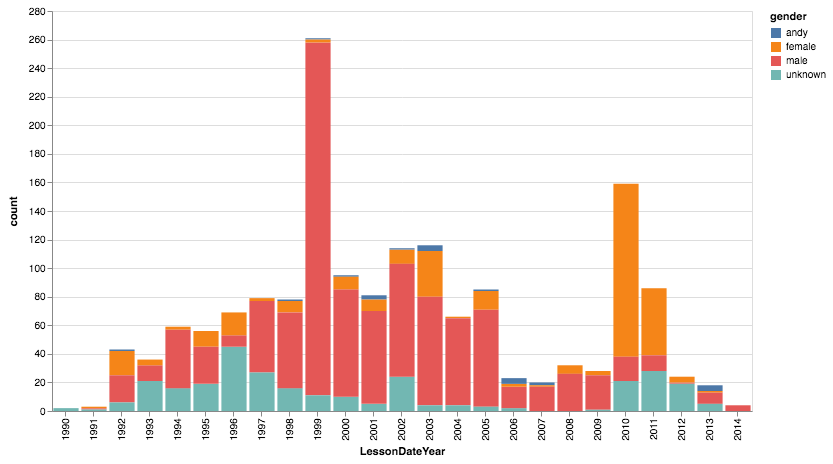

In [34]:
alt.Chart(count_df,  width=700,
    height=400).mark_bar().encode(
    x='LessonDateYear',
    y='count',
    color='gender'
)